# Procesamiento de imágenes con Python y Numpy



**Objetivo**: Aprender a visualizar, generar, cargar y modificar imágenes en blanco y negro o color a través de las operaciones de matrices de la librería Numpy y las facilidades de las librerías PyPlot y skimage.

**Conocimientos previos**: Conceptos básicos de imágenes digitales color y escala de grises. Programación en Python con la librería Numpy.

**Importante**: Para que este cuaderno funcione correctamente, las imágenes 'lena.png' y 'lena_gris.png' deben encontrarse en el mismo directorio que el cuaderno.

## Creando matrices y visualizándolas como imágenes

Las imágenes se codifican como matrices. En particular, las imágenes de intensidad o escala de grises se codifican como una matriz de dos dimensiones, donde cada número representa la intensidad de un pixel.

Pero eso significa que cualquiera de estas matrices que generamos se puede visualizar como una matriz. Para visualizar imágenes, usamos el módulo `pyplot` de  la librería `matplotlib`.


In [1]:
# importamos el modulo pyplot, y lo llamamos plt
import matplotlib.pyplot as plt

#configuracion necesaria de pyplot para ver las imagenes en escala de grises
plt.rcParams['image.cmap'] = 'gray'


# comando de Jupyter para que las imagenes se muestren automaticamente 
%matplotlib inline

#tambien importamos numpy ya que lo usamos para crear y manipular matrices
import numpy as np


NameError: name 'keras' is not defined

La función que nos permite visualizar matrices es `imshow` del modulo `pyplot`, que invocaremos como `plt.imshow`, y recibe la imagen como parámetro.

Debido a que pyplot intenta ajustar los colores automaticamente de una imagen, vamos a pasarle como parámetros también `vmin=0,vmax=1`. Si bien no los vimos antes, estos se llaman *keyword parameters* o *parámetros por palabra clave* de python.

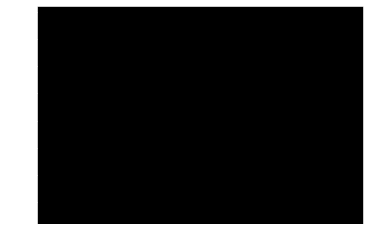

In [2]:
#tamaño de las matrices a visualizar
size=(20,30)

# Una matriz de ceros. 
imagen_negra = np.zeros(size)

#visualizamos la matriz
#Se ve como una imagen negra, ya que todos los elementos (pixeles) tienen intensidad 0
plt.imshow(imagen_negra,vmin=0,vmax=1)
# (es necesario indicar vmin y vmax para que pyplot sepa que el minimo es 0 y el maximo 1)
# (solo imagenes escala de grises)

También podemos generar imágenes blancas, o grises. Si queremos mostrar más de una imagen en una celda, vamos a tener que ejecutar `plt.figure()` para crear la figura que contenga la imagen.

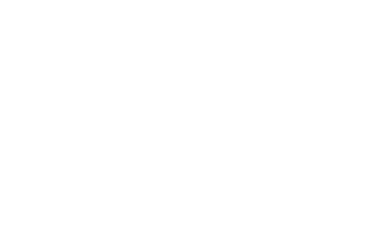

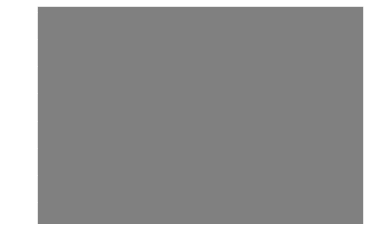

In [3]:
# IMAGEN BLANCA
# Una matriz de unos. 
imagen_blanca = np.ones(size)

#visualizamos la matriz
#Se ve como una imagen blanca, ya que todos los elementos (pixeles) tienen intensidad 1
plt.imshow(imagen_blanca,vmin=0,vmax=1)

#creamos otra figura para mostrar la imagen (sino el proximo imshow sobreescribe al anterior)
plt.figure()

# IMAGEN GRIS
# Una matriz con valor 0.5 en todos sus elementos 
imagen_gris = np.ones(size)*0.5

#visualizamos la matriz
#Se ve como una imagen gris, ya que todos los elementos (pixeles) tienen intensidad 0.5
plt.imshow(imagen_gris,vmin=0,vmax=1)


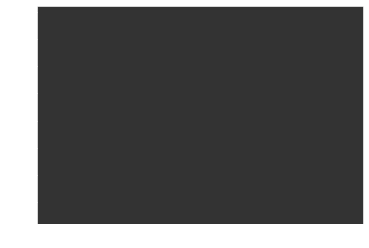

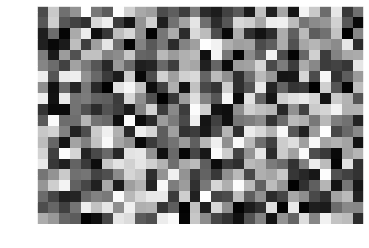

In [5]:
# IMAGEN GRIS OSCURO
# Una matriz con valor 0.2 en todos sus elementos 
imagen_gris_oscuro = np.ones(size)*0.2

#visualizamos la matriz
#Se ve como una imagen gris, ya que todos los elementos (pixeles) tienen intensidad 0.5
plt.imshow(imagen_gris_oscuro,vmin=0,vmax=1)

#creamos otra figura para mostrar la imagen (sino el proximo imshow sobreescribe al anterior)
plt.figure()

# IMAGEN ALEATORIA
# Una matriz con valor aleatorio
imagen_aleatoria = np.random.rand(size[0],size[1])

#visualizamos la matriz
#Se ve como una imagen gris, ya que todos los elementos (pixeles) tienen intensidad 0.5
plt.imshow(imagen_aleatoria,vmin=0,vmax=1)


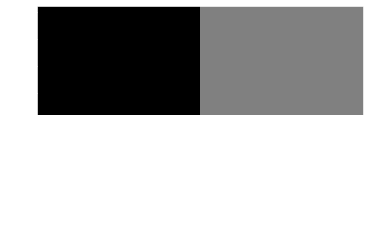

In [21]:
#Ejercicio
# Generar una imagen que sea toda blanca de la mitad para abajo
# Y que la mitad derecha de la parte de arriba sea gris
#      NG
#      BB

imagen_negra = np.zeros((20,30))

#IMPLEMENTAR - COMIENZO
imagen_negra[10:,:] = np.ones((10,30))
imagen_negra[0:10,15:] = np.ones((10,15))*0.5
#IMPLEMENTAR - FIN

plt.imshow(imagen_negra)

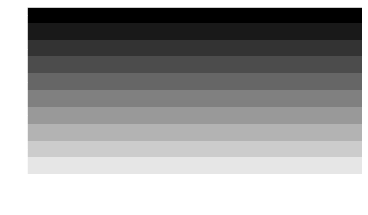

In [22]:
#Ejercicio para repasar (NO SE HARA EN EL TALLER)
# Modificar la variable imagen_gradiente para que cada fila tenga una intensidad creciente
# La fila 0 debe tener intensidad 0
# La fila 1 debe tener intensidad 0.1
# La fila 1 debe tener intensidad 0.2
# ...
# La fila 9 debe tener intensidad 0.9
# La fila 10 debe tener intensidad 1

imagen_gradiente = np.zeros((11,20))

#IMPLEMENTAR - COMIENZO
for i in range(1,11):
    imagen_gradiente[i, :] = np.ones((1,20)) * i / 10
#IMPLEMENTAR - FIN

plt.imshow(imagen_gradiente)

## Lectura de imágenes

Para leer imágenes utilizaremos el módulo `io` de la librería `skimage`. En ese módulo tenemos la función `imread` para leer imágenes de un archivo(y también la función `imsave` para escribirlas a un archivo).

- Dimensiones de la imagen:
[[0.63137255 0.63137255 0.63137255 ... 0.6627451  0.60392157 0.49803922]
 [0.63137255 0.63137255 0.63137255 ... 0.6627451  0.60392157 0.49803922]
 [0.63137255 0.63137255 0.63137255 ... 0.6627451  0.60392157 0.49803922]
 ...
 [0.18431373 0.18431373 0.20784314 ... 0.40784314 0.39215686 0.38431373]
 [0.18823529 0.18823529 0.22745098 ... 0.40784314 0.41176471 0.42352941]
 [0.18823529 0.18823529 0.22745098 ... 0.40784314 0.41176471 0.42352941]]


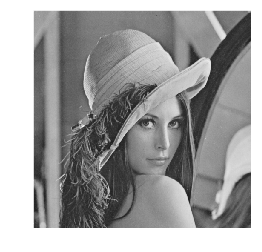

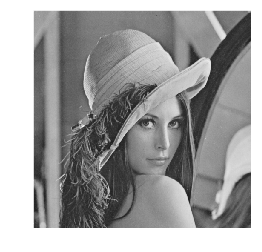

In [39]:
from skimage import io

image=io.imread("./Practica 3/lena_gray.png")/255.0 # imread lee las imagenes con los pixeles codificados como enteros 
# en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1

print("- Dimensiones de la imagen:")
print(image)
plt.imshow(image,vmin=0,vmax=1)
plt.figure()
plt.imshow(io.imread("./Practica 3/lena_gray.png"), vmin=0, vmax=255)


Esta es la imágen de Lena; es extremadamente conocida en el área de procesamiento de imágenes porque siempre se usa para evaluar nuevas técnicas y efectos.

## Imágenes a color

También podemos cargar imágenes a color con `imread`.


[[[0.88627451 0.5372549  0.49019608]
  [0.88627451 0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156863]
  ...
  [0.90196078 0.58039216 0.47843137]
  [0.86666667 0.50980392 0.43137255]
  [0.78431373 0.38823529 0.35294118]]

 [[0.88627451 0.5372549  0.49019608]
  [0.88627451 0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156863]
  ...
  [0.90196078 0.58039216 0.47843137]
  [0.86666667 0.50980392 0.43137255]
  [0.78431373 0.38823529 0.35294118]]

 [[0.88627451 0.5372549  0.49019608]
  [0.88627451 0.5372549  0.49019608]
  [0.8745098  0.5372549  0.52156863]
  ...
  [0.90196078 0.58039216 0.47843137]
  [0.86666667 0.50980392 0.43137255]
  [0.78431373 0.38823529 0.35294118]]

 ...

 [[0.32941176 0.07058824 0.23529412]
  [0.32941176 0.07058824 0.23529412]
  [0.36078431 0.10588235 0.22745098]
  ...
  [0.67843137 0.28627451 0.32941176]
  [0.6745098  0.26666667 0.29803922]
  [0.69411765 0.24313725 0.30980392]]

 [[0.32156863 0.08627451 0.22352941]
  [0.32156863 0.08627451 0.22352941]


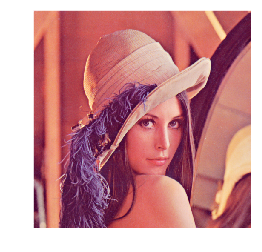

In [40]:
lena_rgb=io.imread("./Practica 3/lena.png")/255.0 # imread lee las imagenes con los pixeles codificados como enteros 
# en el rango 0-255. Por eso la convertimos a flotante y en el rango 0-1
plt.imshow(lena_rgb) # no es necesario el vmin/vmax para imágenes a color
print(lena_rgb)
print("Dimensiones de la imagen:")
print(lena_rgb.shape)

En este caso, tenemos tres dimensiones. Las primeras dos, de tamaño $512$, corresponden a la cantidad de pixeles de la imagen. La última, de tamaño 3, contiene los tres canales R, G y B de la imagen.


Podemos ver cada canal individualmente, como si el canal fuera una imagen en escala de grises, para ver la intensidad de cada canal.

Text(0.5, 1.0, 'Canal Azul')

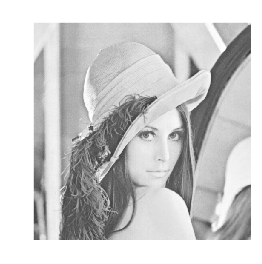

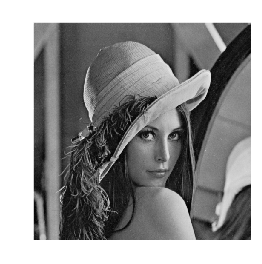

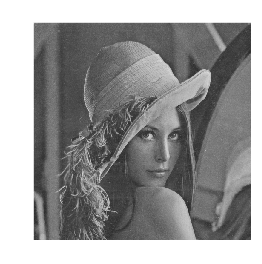

In [41]:

plt.imshow(lena_rgb[:,:,0],vmin=0,vmax=1)
plt.title("Canal Rojo")
plt.figure()
plt.imshow(lena_rgb[:,:,1],vmin=0,vmax=1)
plt.title("Canal Verde")
plt.figure()
plt.imshow(lena_rgb[:,:,2],vmin=0,vmax=1)
plt.title("Canal Azul")


Podemos ver que el canal rojo es el más activo, ya que la imagen contiene mucha piel y un fondo crema/anaranjado. Además, el canal verde es el que tiene más detalles de la imagen.

Otra manera de ver la información de cada canal es quitar la información de los otros canales. Por ejemplo, para ver el canal rojo, ponemos en 0 los canales azul y verde.

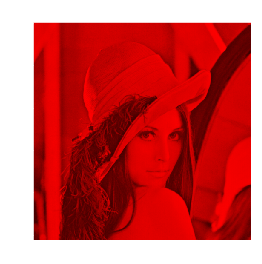

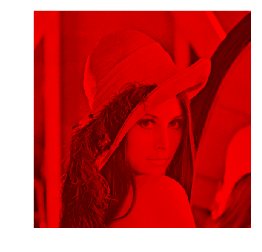

In [42]:
lena_red=np.copy(lena_rgb) # creo una copia de la imagen para preservar la original
lena_red[:,:,1]=0
lena_red[:,:,2]=0
plt.title("Lena_ canal rojo")
plt.imshow(lena_red)
plt.figure()
plt.imshow(lena_red, vmin=0, vmax=1)

Podemos observar que sin los canales azul y verde perdemos bastante información de color, aunque la silueta se mantiene. 

Ahora probemos quitando sólo un canal, por ejemplo, el azul:

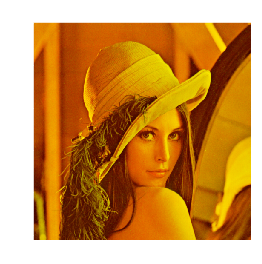

In [43]:
lena_red_green=np.copy(lena_rgb) # creo una copia de la imagen para preservar la original
lena_red_green[:,:,2]=0
plt.title("Lena_ sin canal azul")
plt.imshow(lena_red_green)

De nuevo, se ha perdido información color, pero mucho menos, ya que justamente el canal azul era el menos importante.

### Conversión de color a escala de grises

La conversión de una imagen de color a escala de grises se puede hacer de varias formas. 

El pixel $(1,1,1)$ representa el blanco y el $(0,0,0)$ el negro en RGB. Entonces, cuanto más grandes son los valores de los canales, más "blanco" es el pixel y viceversa. 

Por eso, una forma simple para hacer la conversión consiste en sacar el promedio de los canales y usar eso como la intensidad. 

Entonces cada trio $(r,g,b)$ que representa un pixel se reemplaza por su promedio $\frac{(r+g+b)}{3}$.

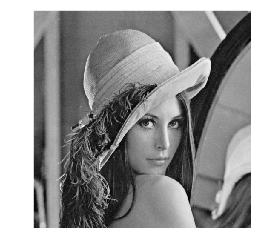

In [45]:
# Ejercicio: Convertir la imagen de lena color a escala de grises

h,w,c=lena_rgb.shape # obtenemos el tamaño de la imagen original

lena_gris=np.zeros((h,w)) # creamos una matriz donde generar la imagen

for i in range(h):
    for j in range(w):
        
        #IMPLEMENTAR - COMIENZO
        # calcular el promedio de los canales r,g,b del pixel i,j con la imagen original
        lena_gris[i,j] = lena_rgb[i,j,:].mean()
        # guardar ese promedio en el pixel i,j de la imagen generada
        pass
        #IMPLEMENTAR - FIN

plt.imshow(lena_gris)

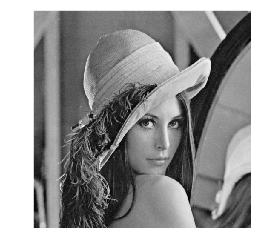

In [50]:
# Ejercicio: Convertir la imagen de lena color a escala de grises, pero sin usar fors
# Tomar cada canal como una imagen por separado
# Utilizando suma de matrices (o sea, de imágenes),
# Suma los canales y dividi el resultado por 3.

#IMPLEMENTAR - COMIENZO
lena_gris_simple= lena_rgb.mean(axis=2) 
#IMPLEMENTAR - FIN

plt.imshow(lena_gris_simple) #descomentar para probar


### Guardar imágenes

Guardar imágenes es tan simple como cargarlas con la función `imsave` del módulo `skimage.io`.


In [51]:
#guardamos la imagen de lena gris generada

io.imsave("lena_generada.png",lena_gris)


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
